In [1]:
#linear regression is a supervised regression model, but logistic regression is a supervised classification model
#predicting the value of a certain image - classifying it based on training data

import torch
#The torchvision package consists of popular datasets, model architectures, and common image transformations 
#for computer vision.
import torchvision
#import the MNIST dataset, which has all of the images - very popular, like the iris dataset
from torchvision.datasets import MNIST
import numpy

In [2]:
#actually download the dataset inside the data directory
dataset = MNIST(root='data/', download=True)

In [3]:
#look in your ml-notebooks directory - there is a directory called data. This is where we will store all of 
#the datasets that need separate files. The linear regression model was trained on very small amounts of data
#and they were both tensors, so its easier to just store the data locally

In [4]:
#The dataset has 60,000 images! We will have an ample amount of training data
print(len(dataset))

60000


In [5]:
#this dows not need to be download
test = MNIST(root='data/', train=False)
print(len(test))

10000


In [6]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x126EE9240>, 5)


Label: 0


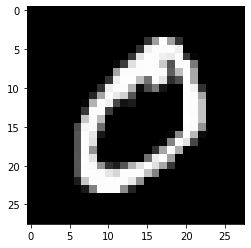

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[1]

plt.imshow(image, cmap='gray')
print("Label:", label)

In [8]:
import torchvision.transforms as transforms

dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())
ten, lab = dataset[0]


In [9]:
#Print the pixels at the 10th to 15th y axis 
print(ten[:,10:15, 10:15])
#1 represents white, and 0 represents black - the some of these values are just in between

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


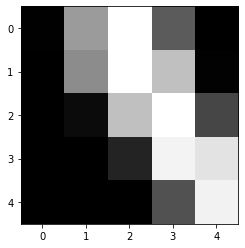

In [10]:
plt.imshow(ten[0,10:15,10:15], cmap='gray')

In [11]:
#split set into 3 models - training set, validation set, test set
#training set - used to train the model , compute the loss, adjust the weights 
#validation set - evaluate the model while training, adjust parameters like the learning rate, and pick the best model
#test set - used to compare models

In [12]:
import numpy as np

def split_indices(n, val_pct):
    #split the val into a training dataset and a validation dataset
    n_val = int(val_pct*n)
    
    #random images for the validation set and for the training dataset 
    idxs = np.random.permutation(n)
    
    #returns the first n_vals in a tuple, so basically a fraction of the entire dataset, and splits the rest for
    #the training set
    return idxs[n_val:], idxs[:n_val]

In [13]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

In [14]:
#randomize the data in order to remove bias

#sample randomly from indices
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [15]:
batches = 100

#randomize the data samples
train_sampler = SubsetRandomSampler(train_indices)
train_loader= DataLoader(dataset, batches, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batches, sampler=val_sampler)


In [16]:
#Define the model

#The logistic regression model is very similar to the linear regression model

#there are weights and there are biases - output is obtained by using matrix operations

#we can use nn.Linear to crreate the model - and flattened to a vector of size 784

In [17]:
import torch.nn as nn

#the output of each image is a vector of size 10, with each element of the vector signifying the probability of 
#a particular target label - 0 to 9

input_size = 28*28 #flatten the image

num_classes = 10

# model = nn.Linear(input_size, num_classes)

#super similar to the linear regression model - but this time the inputs and the outputs are way more


In [18]:
# for imgs, labels in train_loader:
#     print(labels)
#     print(imgs.shape)
#     outputs = model(imgs)
#     break

In [19]:
#Since the linear method is expecting a vector, we can't just pass in a tensor that has 3 dimensions, 
#we need to flatten it out - we can do this by creating a model class that inherists from the nn.module class
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        #putting -1 allows us to use any batch size
        xb=xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    
model = MnistModel()

for images, labels in train_loader:
    outputs = model(images)
    break
    
print(outputs.shape, outputs[:1].data) 


#the outputs are the random result of passing in the images into the model. However, we need them to represent
#a probability, which is between 1 and 0

torch.Size([100, 10]) tensor([[ 0.1275,  0.3639,  0.0733, -0.0032,  0.0215, -0.2822, -0.1885, -0.0975,
         -0.1118, -0.0448]])


In [20]:
#softmax function
#probability is boosted up, tries to push it towards one output
#divide by sum to end up with probabilities

import torch.nn.functional as F

In [21]:
probs = F.softmax(outputs, dim=1)

#these sum up to one

In [22]:
max_probs, preds = torch.max(probs, dim=1)
#index of the max probability
print(preds)
# print(max_probs)

tensor([1, 1, 7, 1, 3, 7, 2, 7, 1, 3, 1, 7, 1, 3, 3, 3, 7, 3, 3, 7, 3, 3, 1, 3,
        3, 1, 3, 3, 3, 1, 7, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 2, 3, 3, 1, 9, 3, 2, 1, 0, 1, 0, 3, 1, 1, 3, 3, 1, 8, 7, 1,
        2, 5, 1, 2, 1, 3, 5, 1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
        0, 5, 1, 3])


In [23]:
#what the number is in the index
labels

tensor([7, 4, 3, 1, 4, 7, 6, 9, 0, 6, 1, 3, 8, 6, 6, 8, 9, 9, 6, 9, 7, 6, 5, 2,
        9, 3, 5, 2, 2, 1, 9, 4, 7, 9, 2, 9, 4, 7, 0, 7, 3, 9, 3, 9, 5, 6, 2, 7,
        4, 5, 5, 4, 2, 3, 8, 1, 1, 8, 4, 2, 3, 1, 4, 9, 4, 8, 6, 8, 4, 1, 5, 9,
        2, 3, 0, 1, 5, 6, 0, 0, 2, 6, 2, 3, 5, 5, 2, 8, 8, 6, 7, 0, 8, 7, 4, 1,
        0, 6, 9, 2])

In [24]:
def accuracy(l1, l2):
    #l1 is the predictions, and l2 is the labels
    
    #the == operator checks which if the numbers line up
    
    #in total, 8 of the 100 numbers were matching. This is pretty bad - especially when you calculate the ratio
    return torch.sum(l1 == l2).item()/len(l1)
    

In [25]:
#the model has 8% accuracy
accuracy(preds, labels)

0.13

In [26]:
#this cannot be used for gradient descent - mse is differentiable but torch.max() is not differentiable
#the accuracy function is not looking at the actual probabilty 


#a good metric for the loss function is corss entropy

In [27]:
#Cross Entropy

#find where there is a correct value and then take the negative natural log of that value, 

loss_fn = F.cross_entropy
#instead of passing in preds, which is softmaxed, we pass in the bare value, and it performs softmax on it
loss = loss_fn(outputs,labels)


loss

tensor(2.3444, grad_fn=<NllLossBackward>)

In [28]:
import math
def calc_accuracy(val):
    return math.exp(-val)
    

In [29]:
#holy shit thats doo doo
calc_accuracy(loss)

0.0959083015922264

In [57]:
learning_rate = 1e-3

#weights and biases
print(list(model.parameters()))
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

[Parameter containing:
tensor([[ 0.0226, -0.0066, -0.0253,  ...,  0.0092, -0.0098, -0.0002],
        [-0.0244, -0.0302, -0.0278,  ..., -0.0201,  0.0049, -0.0121],
        [ 0.0241,  0.0071,  0.0189,  ..., -0.0245,  0.0092, -0.0114],
        ...,
        [ 0.0047, -0.0147,  0.0222,  ...,  0.0316,  0.0196,  0.0198],
        [ 0.0109,  0.0239, -0.0029,  ..., -0.0238, -0.0100, -0.0052],
        [-0.0147, -0.0051, -0.0225,  ..., -0.0128, -0.0027,  0.0199]],
       requires_grad=True), Parameter containing:
tensor([ 0.0119,  0.0084, -0.0297, -0.0348, -0.0138, -0.0282,  0.0102, -0.0052,
        -0.0109,  0.0053], requires_grad=True)]


In [58]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [59]:
#calculate the loss on a batch
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
    #define the intial predictions
    preds = model(xb)
    #calculate the loss
    loss = loss_fn(preds, yb)
#     print(loss)
    
    if opt is not None:
        #evaluate the gradients
        loss.backward()
        #re-pass the parameters in the optimizer
        opt.step()
        #set the gradients back to zero
        opt.zero_grad()
    
    
    metric_result = None
    #a metric is either the accuracy function or the cross entropy function
    if metric is not None:
        #calculate the accuracy of the predictions and yb, which is the y value of the batch
        
        
        #this is where we are calling the metric
        metric_result = metric(preds, yb)
        
    return loss.item(), len(xb), metric_result
    

In [60]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    #no computation of gradients - because this is used for the validation dataset
    with torch.no_grad():
        results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]
        #calculate the loss on the batch, which returns the cross entropy loss, and the accuracy prediction
#         print(results)
        
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
    return avg_loss, total, avg_metric
        

In [61]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item()/len(labels)
    

In [62]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(val_loss, val_acc)

1.8997616132100423 0.6371666666666667


In [63]:
#the training set and the validation set are very similar at this point - this is a good thing

In [83]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
            
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epoch, val_loss))
    
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [84]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [85]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8776, accuracy: 0.6502
Epoch [2/5], Loss: 1.5771, accuracy: 0.7494
Epoch [3/5], Loss: 1.3654, accuracy: 0.7821
Epoch [4/5], Loss: 1.2129, accuracy: 0.7993
Epoch [5/5], Loss: 1.0997, accuracy: 0.8127


In [86]:
#see how it grows logistically - not really grows after some time - 85% is the cap

In [87]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

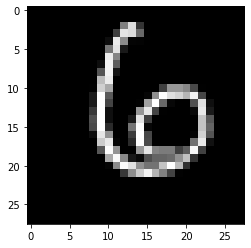

In [96]:
img, label = test_dataset
plt.imshow(img[0], cmap= 'gray')

In [97]:
img.unsqueeze(0).shape

#make it 4d

torch.Size([1, 1, 28, 28])

In [98]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1 )
    return preds[0].item()

In [99]:
predict_image(img, model)

6

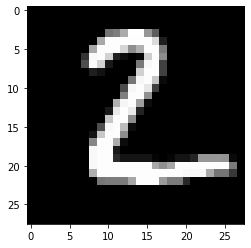

In [121]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap='gray')

In [ ]:
print(preds)

In [155]:
var = 100

def make_pred(var):
    t, l = test_dataset[var]

    plt.imshow(t[0], cmap='gray')
    print(predict_image(t[0], model))

7
2
1


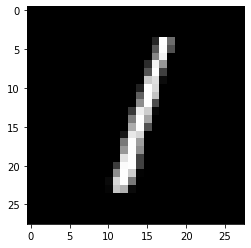

In [156]:

for i in range(3):
    make_pred(i)